In [1]:
import maintsim
import random
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

%xmode verbose

Exception reporting mode: Verbose


In [2]:
sys = maintsim.System(process_times=[3, 5, 4],
                      buffer_sizes=10,
                      failure_mode='degradation',
                      failure_params=[0.25]*3,
                      maintenance_policy='CBM',
                      maintenance_params={'CBM threshold':[10,10,10]},
                      repair_params={'CM':stats.randint(10,20),
                                     'CBM':stats.randint(15,25)},
                      # repair_params={'CM':{'uniform':{'low':10,'high':20)},
                      #                'PM':{'uniform':{'low':5, 'high':10}}},
                      maintenance_capacity=3, debug=False)

In [13]:
sys.simulate(sim_time=100)

Simulation complete in 0.32s

  Units produced:      11
  System availability: 80.33%



In [14]:
sys.machine_data[['M{} health'.format(m) for m in range(3)]].ffill()[40:60]

,M0 health,M1 health,M2 health
40,9.0,10.0,10.0
41,9.0,10.0,10.0
42,9.0,10.0,10.0
43,9.0,10.0,10.0
44,10.0,10.0,10.0
45,10.0,10.0,10.0
46,10.0,10.0,10.0
47,10.0,10.0,10.0
48,10.0,10.0,0.0
49,10.0,0.0,0.0


In [10]:
sys.env.now

22

In [2]:
sys = maintsim.System(process_times=[3, 4],
                      buffer_sizes=10,
                      failure_mode='degradation',
                      failure_params=[0.25]*2,
                      maintenance_policy='CBM',
                      maintenance_params={'CBM threshold':[7,6]},
                      repair_params={'CM':stats.randint(10,20),
                                     'CBM':stats.randint(20,25)},
                      # repair_params={'CM':{'uniform':{'low':10,'high':20)},
                      #                'PM':{'uniform':{'low':5, 'high':10}}},
                      maintenance_capacity=1)

In [3]:
sys.simulate(sim_time=100)

CBM requested at t=24
M0 requesting maintenance at t=24
M0 starting maintenance at t=24
degradation interrupted at t=24
CBM requested at t=34
M1 requesting maintenance at t=34
CBM requested at t=35
CBM requested at t=36
CBM requested at t=37
M1 starting maintenance at t=39
degradation interrupted at t=39


Interrupt: Interrupt(None)

In [4]:
sys.maintenance_data.dropna()

,time,machine,type,activity,duration
100,24,0,CBM,failure,NA
0,48,0,CBM,repair,24


In [9]:
sys.machine_data['M1 health'].dropna()

9      1
13     2
18     3
24     4
32     5
34     6
35     7
36     8
37     9
39    10
Name: M1 health, dtype: object

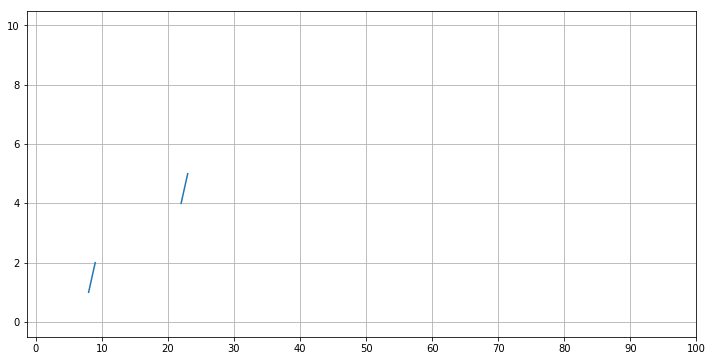

In [11]:
plt.figure(figsize=(12,6))
plt.plot(sys.machine_data[['M0 health', 'M1 health']])
plt.xticks(np.arange(0,101,10))
colors = ['red', 'orange']
for t in sys.maintenance_data['time'].values:
    #plt.axvline(x=t, c='red')
    pass
plt.grid()
plt.show()

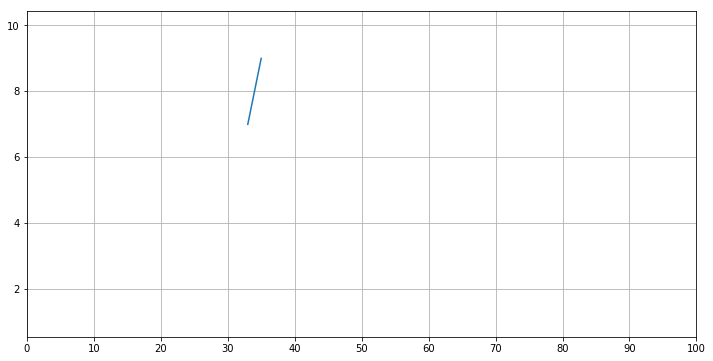

In [5]:
plt.figure(figsize=(12,6))
plt.plot(sys.machine_data[['M{} health'.format(m) for m in range(1)]])
plt.xticks(np.arange(0,101,10))
plt.grid()
plt.show()

In [38]:
sys.machine_data[['M{} health'.format(m) for m in range(3)]]

,M0 health,M1 health,M2 health
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,1.0,0.0
3,1.0,2.0,0.0
4,1.0,2.0,0.0
5,2.0,2.0,0.0
6,2.0,2.0,0.0
7,2.0,2.0,0.0
8,2.0,2.0,0.0
9,2.0,2.0,0.0
